In [1]:
import networkx as nx
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

In [4]:
# Đọc data từ file csv
data = pd.read_excel('enron_transformation.xlsx', sheet_name=2, engine='openpyxl')

In [3]:
# Xem data
print(data)

     staff_label  staff_label.1  weight
0              1              2       2
1              3              4       2
2              4              2       2
3              5              6       2
4              7              2       2
..           ...            ...     ...
261          147            119       1
262          147            126       1
263          148             73       1
264          150            139       1
265          151             81       1

[266 rows x 3 columns]


In [4]:
# Tạo đồ thị
graph = nx.Graph()
for index, row in data.iterrows():
        graph.add_edge(row['staff_label'], row['staff_label.1'])

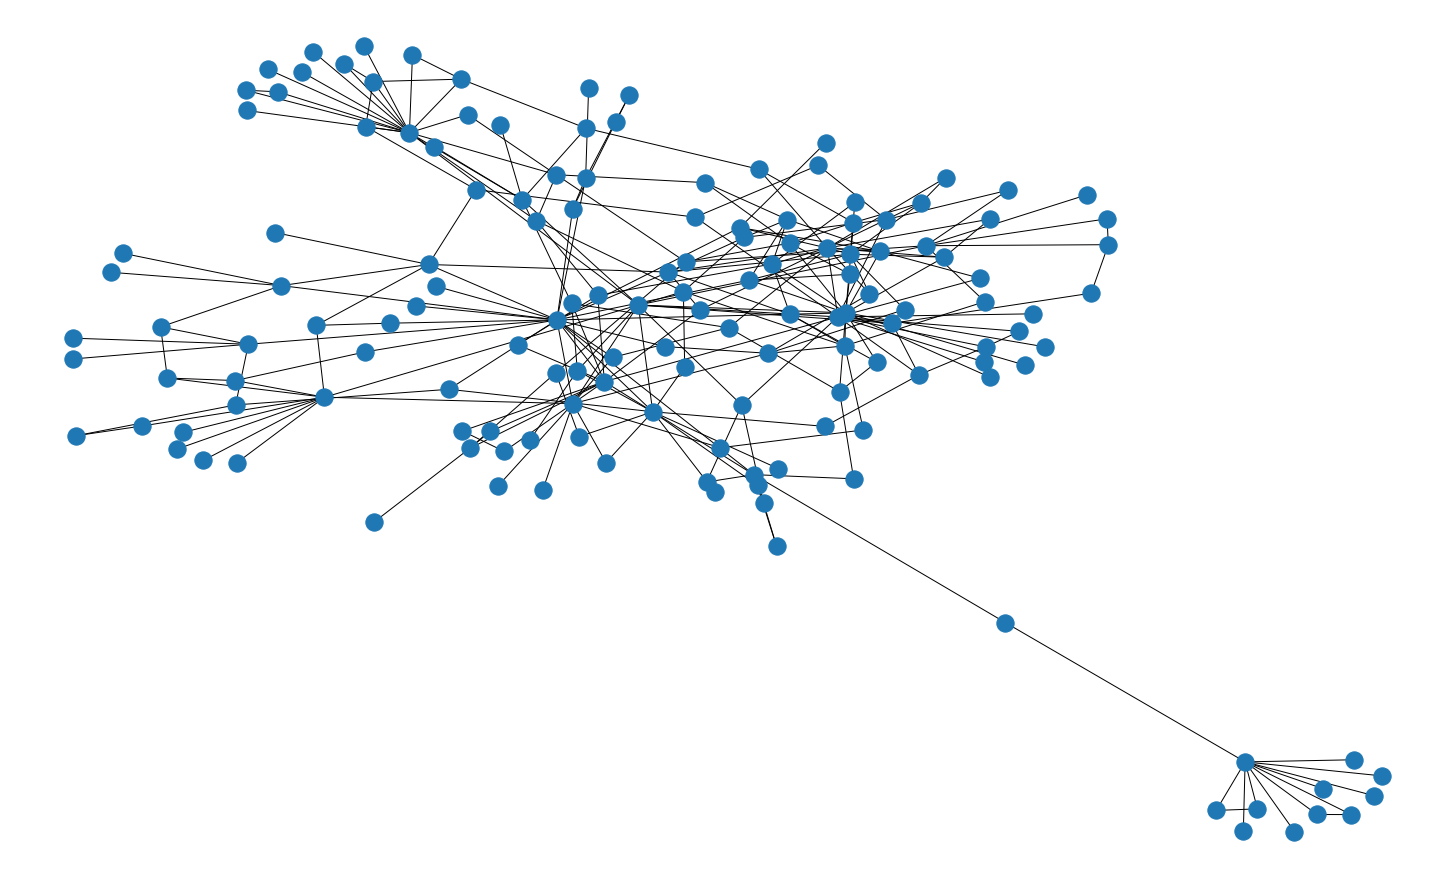

In [5]:
# Đồ thị gốc
plt.figure(figsize=[20,12])
nx.draw(graph)
plt.show()

In [6]:
# Closeness Centrality

# Tìm giá trị độ đo closeness cho từng node
closeness = nx.closeness_centrality(graph)



In [7]:
# Xuất ra tập giá trị closeness
for key,value in closeness.items():
    print(key, ":", value)


1 : 0.35799522673031026
2 : 0.38071065989847713
3 : 0.2332814930015552
4 : 0.30364372469635625
5 : 0.17221584385763491
6 : 0.2077562326869806
7 : 0.3054989816700611
8 : 0.31512605042016806
9 : 0.39267015706806285
20 : 0.3546099290780142
10 : 0.2782931354359926
11 : 0.3218884120171674
12 : 0.28517110266159695
13 : 0.24834437086092714
14 : 0.3138075313807531
59 : 0.30060120240480964
15 : 0.22488755622188905
16 : 0.28957528957528955
17 : 0.2336448598130841
18 : 0.3184713375796178
19 : 0.3546099290780142
22 : 0.28790786948176583
23 : 0.28790786948176583
24 : 0.2824858757062147
26 : 0.23734177215189872
27 : 0.2846299810246679
28 : 0.2336448598130841
29 : 0.22488755622188905
30 : 0.28957528957528955
31 : 0.29880478087649404
33 : 0.22255192878338279
34 : 0.2857142857142857
35 : 0.2568493150684932
36 : 0.25252525252525254
37 : 0.26881720430107525
38 : 0.34965034965034963
39 : 0.17221584385763491
40 : 0.22488755622188905
41 : 0.24630541871921183
42 : 0.2737226277372263
43 : 0.25951557093425603


In [8]:
# sắp xếp theo thứ tự giảm dần sau đó lấy ra 10 node có giá trị closeness cao nhất
top10_highest = list({k: v for k, v in sorted(closeness.items(), key=lambda item: item[1], reverse=True)})[:10]

# Hiển thị 10 node có giá trị closeness cao nhất
print(top10_highest)

[9, 2, 66, 1, 20, 19, 38, 65, 11, 110]


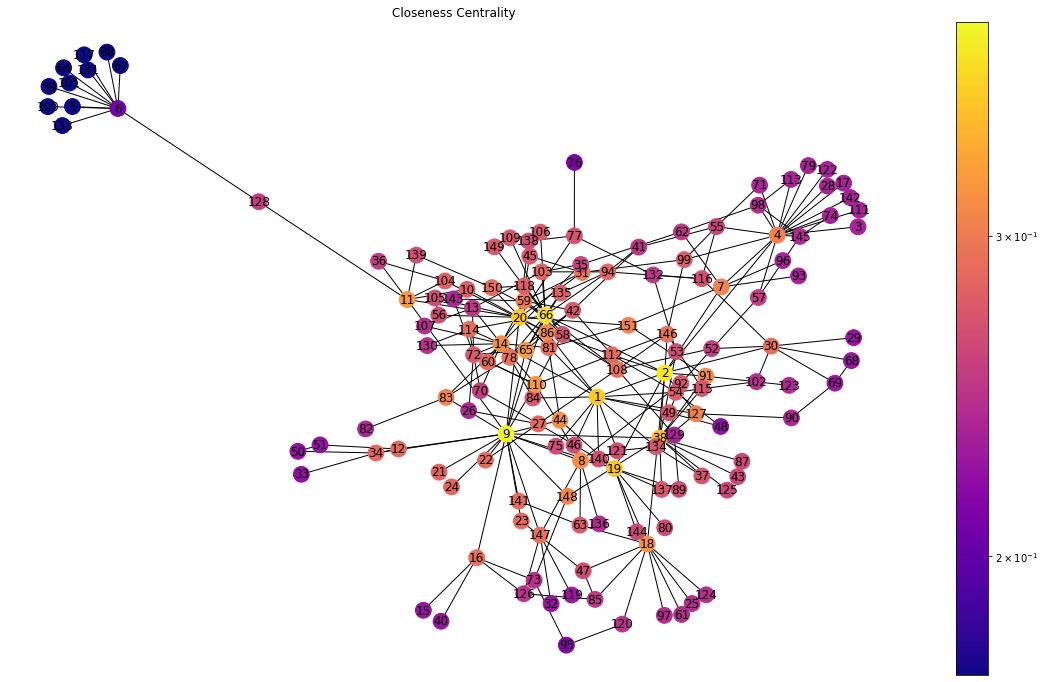

In [9]:
# Visualize đồ thị theo thuật toán Closeness Centrality
pos = nx.spring_layout(graph)
plt.figure(figsize=[20,12])

nodes = nx.draw_networkx_nodes(graph, pos, node_size=250, cmap=plt.cm.plasma,
                                            node_color=list(closeness.values()),
                                            nodelist=closeness.keys(), label=True)

nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))

edges = nx.draw_networkx_edges(graph, pos)

labels = dict()
for item in graph.nodes():
    labels[item] = item
nx.draw_networkx_labels(graph, pos=pos, labels=labels)

plt.title('Closeness Centrality')
plt.colorbar(nodes)
plt.axis('off')
plt.show()

In [10]:
# Betweeness Centrality

# Tìm giá trị Betweeness cho từng node
betweeness = nx.betweenness_centrality(graph)

In [11]:
# Xuất ra tập giá trị betweeness
for key,value in betweeness.items():
    print(key, ":", value)

1 : 0.1429587253412757
2 : 0.3060551556323368
3 : 0.0
4 : 0.16493615283548166
5 : 0.0
6 : 0.1291275167785235
7 : 0.04464092829864643
8 : 0.03683598529236115
9 : 0.3720934206236217
20 : 0.14961907344457684
10 : 0.003793402222932425
11 : 0.17554287844891878
12 : 0.013154362416107384
13 : 0.0016783417924357532
14 : 0.07223536691993064
59 : 0.01802174608886018
15 : 0.0
16 : 0.03876396757604816
17 : 0.0
18 : 0.0964213499649741
19 : 0.10219389583819119
22 : 0.0037076130431835134
23 : 0.006538869035513331
24 : 0.0
26 : 0.0005669672112625134
27 : 0.014750173266951784
28 : 0.0
29 : 0.0
30 : 0.05644638756719298
31 : 0.019367423031852554
33 : 0.0
34 : 0.02644295302013423
35 : 0.006912000502604528
36 : 0.0
37 : 0.002146159582401193
38 : 0.10780310939371343
39 : 0.0
40 : 0.0
41 : 0.004634074848839949
42 : 0.007941456753537293
43 : 0.0
44 : 0.004760529552475859
45 : 0.0
46 : 0.0
48 : 0.0002826249067859806
49 : 0.00961464436632222
50 : 8.94854586129754e-05
51 : 4.47427293064877e-05
52 : 0.00230978467

In [12]:
# sắp xếp theo thứ tự giảm dần sau đó lấy ra 10 node có giá trị betweeness cao nhất
top10_highest = list({k: v for k, v in sorted(betweeness.items(), key=lambda item: item[1], reverse=True)})[:10]

# Hiển thị 10 node có giá trị betweeness cao nhất
print(top10_highest)

[9, 2, 11, 66, 4, 20, 1, 128, 6, 38]


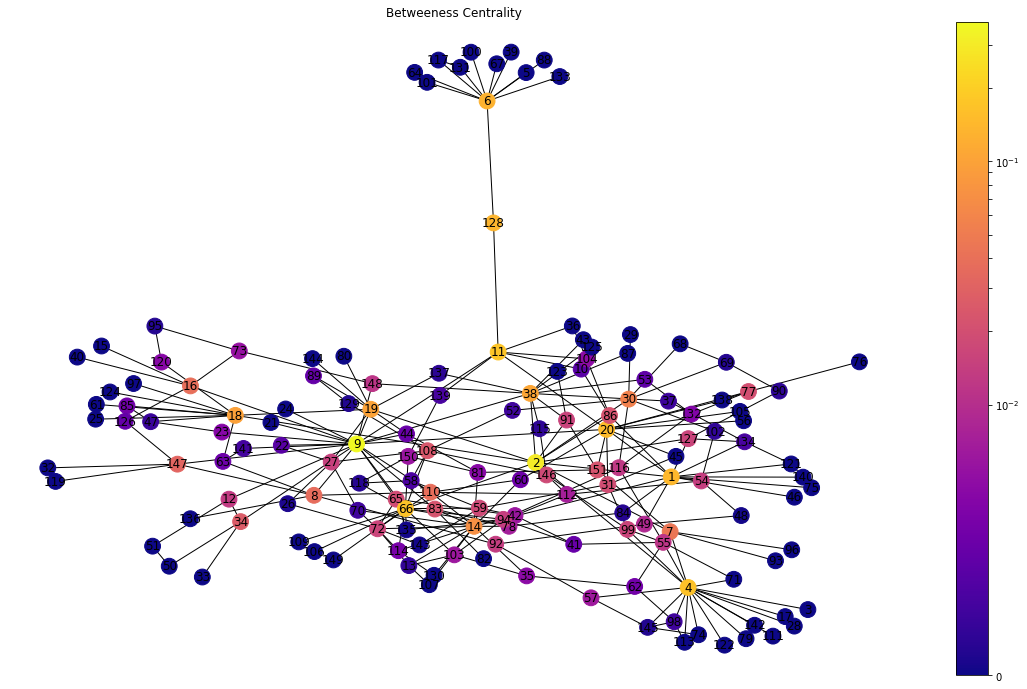

In [13]:
# Visualize đồ thị theo thuật toán Betweeness Centrality
pos = nx.spring_layout(graph)
plt.figure(figsize=[20,12])
            
nodes = nx.draw_networkx_nodes(graph, pos=pos, node_size=250, cmap=plt.cm.plasma,
                                            node_color=list(betweeness.values()),
                                            nodelist=betweeness.keys())
            
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))

edges = nx.draw_networkx_edges(graph, pos)

labels = dict()
for item in graph.nodes():
    labels[item] = item
nx.draw_networkx_labels(graph, pos=pos, labels=labels)

plt.title('Betweeness Centrality')
plt.colorbar(nodes)
plt.axis('off')
plt.show()

In [14]:
# Sử dụng thuật toán Girven-Newman lên đồ thị
edge_betweeness = nx.algorithms.community.girvan_newman(graph)

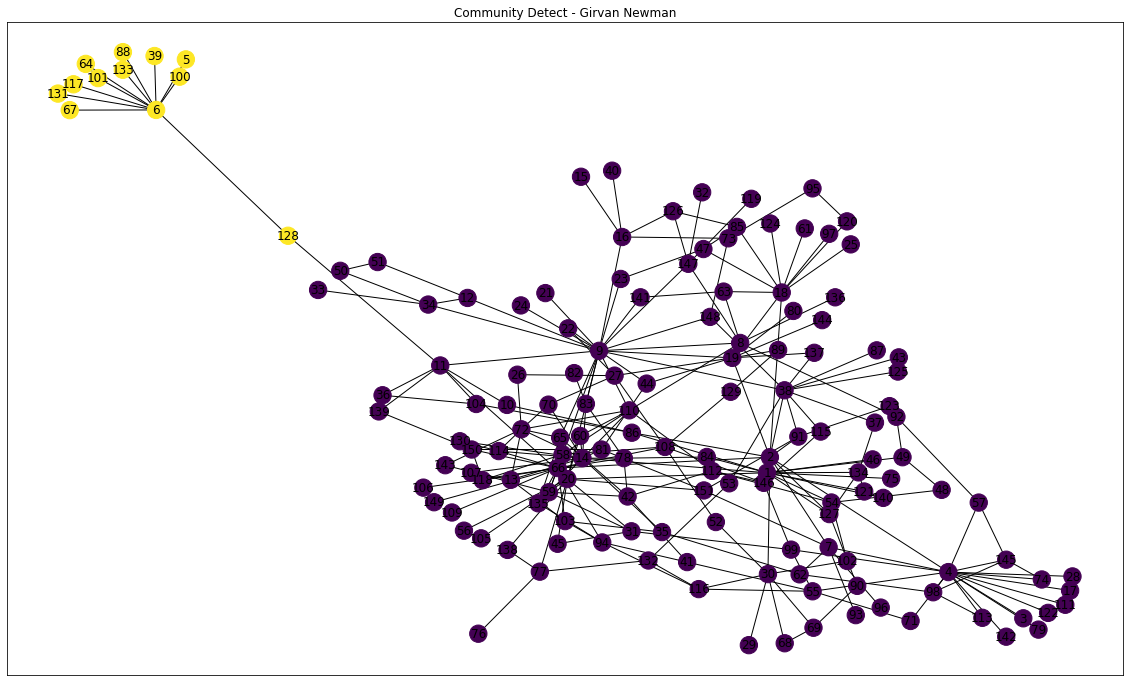

In [15]:
# Visualize đồ thị với thuật toán Girvan-Newman
i = iter(edge_betweeness)

Community = next(i)

flat_nodes = []
color_map = []
color = 0

for com in Community:
    for node in com:
        flat_nodes.append(node)
        color_map.append(color)
    color += 1
    
pos = nx.spring_layout(graph)
plt.figure(figsize=[20,12])
nx.draw_networkx_nodes(graph, pos=pos ,nodelist=flat_nodes, node_color=color_map)
nx.draw_networkx_edges(graph, pos=pos)

labels = dict()
for item in graph.nodes():
    labels[item] = item
nx.draw_networkx_labels(graph, pos=pos, labels=labels)
plt.title('Community Detect - Girvan Newman')
plt.show()

In [16]:
# Xuất các cộng đồng
for com in Community:
    print(com)

{1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151}
{64, 128, 67, 100, 5, 6, 101, 39, 131, 133, 117, 88}


In [23]:
pr = nx.pagerank(graph, alpha=0.85)

In [24]:
for key,value in pr.items():
    print(key, ":", value)

1 : 0.02220506809826342
2 : 0.019870974908108636
3 : 0.0026114773665822915
4 : 0.03236076667934309
5 : 0.0032566992241033726
6 : 0.029265298408029907
7 : 0.011702359452871437
8 : 0.011210377285240571
9 : 0.034479056514826176
20 : 0.018743615670013255
10 : 0.004103723929114287
11 : 0.012889682615206824
12 : 0.006427481562955109
13 : 0.006549247451595758
14 : 0.021048540548871363
59 : 0.009404128589291003
15 : 0.002879035402205867
16 : 0.01108746895094297
17 : 0.00454171938930274
18 : 0.02080668884047962
19 : 0.016704501962268876
22 : 0.003944780336727865
23 : 0.004270633572452932
24 : 0.00245850969296221
26 : 0.0037862670984155676
27 : 0.008743365049738659
28 : 0.004541719389302739
29 : 0.0026142923514786967
30 : 0.013347711015261228
31 : 0.006934269067367969
33 : 0.0028695781652937928
34 : 0.008826374870994434
35 : 0.005328837979608851
36 : 0.004230944606958246
37 : 0.004192728038786101
38 : 0.021050978956867455
39 : 0.0032566992241033726
40 : 0.002879035402205867
41 : 0.00526531812652

In [25]:
# sắp xếp theo thứ tự giảm dần sau đó lấy ra 10 node có giá trị pagerank cao nhất
top10_highest = list({k: v for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)})[:10]

# Hiển thị 10 node có giá trị pagerank cao nhất
print(top10_highest)

[9, 4, 6, 66, 1, 38, 14, 18, 2, 20]


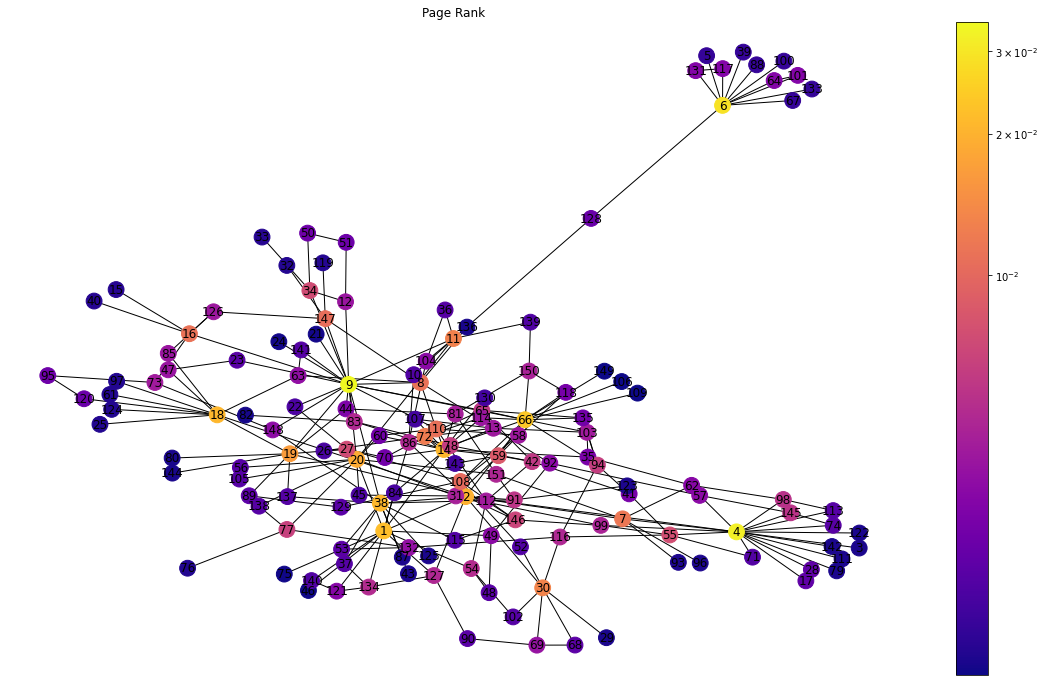

In [27]:
# Visualize đồ thị theo thuật toán Pagerank
pos = nx.spring_layout(graph)
plt.figure(figsize=[20,12])

nodes = nx.draw_networkx_nodes(graph, pos, node_size=250, cmap=plt.cm.plasma,
                                            node_color=list(pr.values()),
                                            nodelist=pr.keys(), label=True)

nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))

edges = nx.draw_networkx_edges(graph, pos)

labels = dict()
for item in graph.nodes():
    labels[item] = item
nx.draw_networkx_labels(graph, pos=pos, labels=labels)

plt.title('Page Rank')
plt.colorbar(nodes)
plt.axis('off')
plt.show()